In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

Defining train and test

In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Removing null values

In [38]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(train)
train = pd.DataFrame(imputer.transform(train),columns=('x','y'))

In [39]:
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
X_test = test.iloc[:,0:1].values
y_test = test.iloc[:,-1].values

Generate regressor and fit the data

In [40]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Plotting the training data

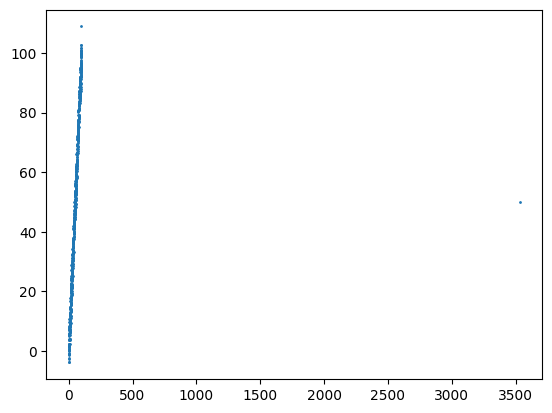

In [47]:
plt.scatter(X_train,y_train, s=1)

Plotting the testing data

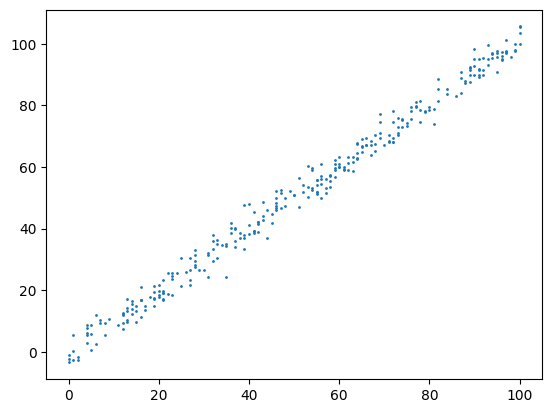

In [42]:
plt.scatter(X_test,y_test, s=1)

Doing this, you will get some unexpected graphics!
Because there is a value too high and must be deleted

In [48]:
# Hint: Run a loop to find the index of max vlaue
max_value = max(y_train)
max_idx = 0
for i in range(len(y_train)):
    if y_train[i] == max_value:
        max_idx = i
max_idx

632

Now we should delete the index of max value to make data more fit

In [50]:
train.iloc[max_idx]
train.drop(max_idx,axis=0,inplace=True) # fill the index
X_train = train.iloc[:,0:1].values
y_train = train.iloc[:,-1].values
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Again,Plotting the training data

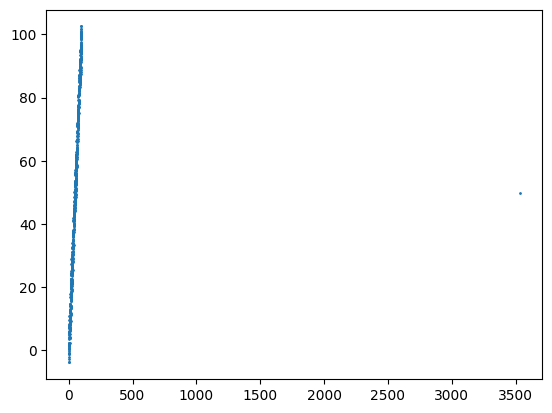

In [51]:
plt.scatter(X_train,y_train, s=1)

Again,Plotting the testing data

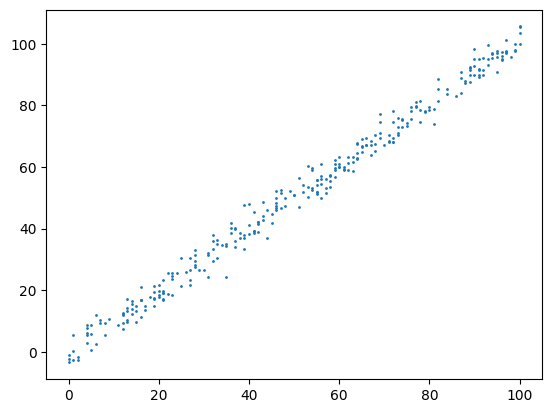

In [52]:
plt.scatter(X_test,y_test, s=1)